__Updated with new calibration factors on 03.04.25__

# pH Calibration Factors
Includes:

- pH calibration factors for the pH probe
- pH calculation formulas, including temperature compensation
- pH probe calibration procedures
- brief description of the calibration procedures
- a formula to compute the calibration slope and intercept values using basic Python, with a function to verify pH calculations (to have a second verification of the C++ code)

## pH Slope, Intercept, and Approximation Calculation

$$ \begin{align}
slope &= \frac{\frac{(7.0 - 4.01)}{(neutralVoltage - acidVoltage)} + \frac{(7 - 10.0)}{(neutralVoltage - baseVoltage)}}{2} \\
intercept &= 7.0 - slope * (neutralVoltage) \\
compensatedSlope &= slope * \frac{(temperature + 273.15)}{(25.0 + 273.15)} \\
pHValue &= compensatedSlope * voltage + intercept
\end{align} $$

Where:

- slope = initial pH slope calculated using known pH values and the respective voltages as measured by the pH sensor,
- interceptPH = the intercept calculated using the neutral voltage as a reference point
- compensatedSlope = the slope adjusted for temperature variations
- pHValue = the calculated pH value





### Calibration Procedure

[1] Prepare pH probe by rinsing with De-Ionized or Battery Water, minimum (3) rinses, preferably (7).

[2] Calibrate pH probe using pH 4.0 or 4.01 buffer solution, minimum (2) times, using the calibration code.
- Note: This probe has a screw-on cap. I filled the cap, affixed it to the probe threads, and proceeded to measure.

[3] The calibration buffer will fill, wait until the 50 measurement threshold is reached, then use that value.

[4] Repeat [step 1] to cleanse the pH probe.

[5] Repeat [step 3] with pH 7.0 buffer solution, minimum (2) times.

[6] Repeat [step 1] to cleanse the pH probe.

[7] Repeat [step 3] with pH 10.0 buffer solution, minimum (2) times.

[8] Repeat [step 1] to cleanse the pH probe.

[9] Write the values into the code, assigning them to appropriate variables. Be sure to use the unmodified voltage registering on pin A0.

## Begin Caculation

In [10]:
#Define resistor offset (10k resistor between ADS1115 A0 pin and ground)
resistancemultiplier = 2

# Set voltages for pH 4.01, 7.00, and 10.01 buffers, as measured by the sensor

neutralVoltage = 788.91 * resistancemultiplier
acidVoltage = 1043.00 * resistancemultiplier
baseVoltage = 561.75 * resistancemultiplier

print("Let's confirm the values...")
print(f'Resistance multiplier: {resistancemultiplier}')
print(f'Neutral voltage: {neutralVoltage}')
print(f'Acid voltage: {acidVoltage}')
print(f'Base voltage: {baseVoltage}')

# degrees Celsius, for temperature compensation, specify the temperature at which
# the sensor is calibrated, or to calculate the pH at a different temperature
temperature = 25.0 

slope = ((7 - 4.01)/(neutralVoltage - acidVoltage)+(7-10)/(neutralVoltage - baseVoltage))/2

print(f'Slope: {slope}')

intercept = 7 - (slope * neutralVoltage)

print(f'Intercept: {intercept}')

compensatedslope = slope*((temperature+273.15)/(25+273.15))

print(f'Compensated slope: {compensatedslope}')

# The volts are in millivolts
def calculatepH(voltage):
    # Calculate pH value
    # Voltage must first be compensated with resistor offset
    phvalue = compensatedslope * voltage + intercept
    print("pH with voltage: ", voltage, " is: ", phvalue)
    return phvalue

Let's confirm the values...
Resistance multiplier: 2
Neutral voltage: 1577.82
Acid voltage: 2086.0
Base voltage: 1123.5
Slope: -0.006243508602849564
Intercept: 16.851132743748096
Compensated slope: -0.006243508602849564


In [3]:
calculatepH(1800)

pH with voltage:  1800  is:  5.612817258618881


5.612817258618881

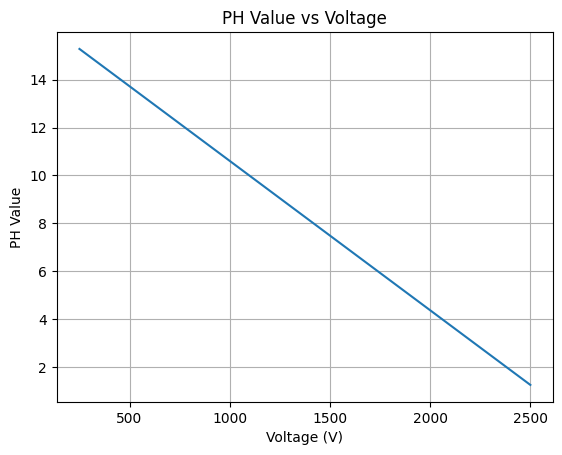

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -0.006243508602849564 * x + 16.851132743748096

plt.figure()
x = np.linspace(250, 2500, 100)
y = f(x)
plt.plot(x, y)
plt.xlabel('Voltage (V)')
plt.ylabel('PH Value')
plt.title('PH Value vs Voltage')
plt.grid()
plt.show()

## TDS EC, Slope, Intercept, and Approximation Calculation

### Calibration Procedure

[1] Prepare TDS probe by rinsing with De-Ionized or Battery Water, minimum (3) rinses, preferably (7).

[2] Calibrate TDS probe using 1413 μs/cm Conductivity Standard (or other appropriate value), minimum (2) times, using the calibration code.
- Note: This probe can only read up to 1000ppm, and 2.3V!

[3] The calibration buffer will fill, wait until the 50 measurement threshold is reached, then use that value.

[4] Repeat [step 1] to cleanse the TDS probe.

[5] Repeat [step 2] using De-Ionized water, max 10μs/cm.

[6] Repeat [step 1] to cleanse the TDS probe.

[7] Write the values into the code, assigning them to appropriate variables. Be sure to use the unmodified voltage registering on pin A0. However, be careful of overfitting.
- This probe is very unstable, and I have been unable to find a manufacturer's table on voltages. I have used the function to approximate the voltages.
- I have used the upper 1413 μs/cm to calculate the voltage multiplier.

# TDS Calibration Factors
Includes:

- TDS calibration factors for the TDS probe
- TDS calculation formulas, including temperature compensation
- TDS probe calibration procedures
- brief description of the calibration procedures
- a formula to compute the calibration slope and intercept values using basic Python, with a function to verify TDS calculations (to have a second verification of the C++ code)

In [5]:
# Define resistor offset (10k resistor between ADS1115 A0 pin and ground)
# EC function is non-linear, and we need to use a multiplier to get the correct value
# using this function: ECValue = (133.42 * voltage * voltage * voltage - 255.86 * voltage * voltage + 857.39 * voltage)
# if y = 1413 μs/cm, x = 1.73398 V
# if y = 10 μs/cm, x = 0.0117039 V
# adjust probe voltage to: voltage * resistancemultiplier, which is multiplier = 1.73398/(rawVoltage for 1413 μs/cm)
# Average probe voltage for 1413 μs/cm before multiplier: 0.499 to 0.550 V
# Average probe voltage for 10 μs/cm before multiplier: 0.014 to 0.012 V
resistancemultiplier = 3.33457692

# Set ppm values for conductivity standard and deionized water, as measured by the sensor

measuredConductivityStandard = 665.76
measuredDeionizedWater = 16.23
kCoefficient = 0.019


print("Let's confirm the values...")
print(f'Resistance multiplier: {resistancemultiplier}')
print(f'Conductivity Standard: {measuredConductivityStandard}')
print(f'Deionized Water: {measuredDeionizedWater}')

# degrees Celsius, for temperature compensation, specify the temperature at which
# the sensor is calibrated, or to calculate the pH at a different temperature
temperature = 25.0 

slope = (706.5 - 2.5) / (measuredConductivityStandard - measuredDeionizedWater)

print(f'Slope: {slope}')

intercept = 0 - slope * measuredDeionizedWater

print(f'Intercept: {intercept}')

# The volts are standard Volts, temperature is in deg C
def ECValue(voltage,temperature):
    # Calculate EC value 
    ECValue = (133.42 * voltage * voltage * voltage - 255.86 * voltage * voltage + 857.39 * voltage)
    tempCorrection = 1.0 + kCoefficient * (temperature - 25.0)
    compensatedEC = ECValue / tempCorrection
    print("EC with voltage: ", voltage, " is: ", compensatedEC)
    return compensatedEC

def TdsValue(ECValue):
    # Calculate initial TDS value, computed from the compensated EC value
    rawTds = ECValue * 0.5
    # Apply the linear regression to correct the TDS value 
    correctedTds = slope * rawTds + intercept
    print("TDS with EC: ", ECValue, " is: ", correctedTds)
    return correctedTds

Let's confirm the values...
Resistance multiplier: 3.33457692
Conductivity Standard: 665.76
Deionized Water: 16.23
Slope: 1.0838606376918696
Intercept: -17.591058149739045


In [6]:
TdsValue(ECValue(0.0493,25))

EC with voltage:  0.0493  is:  41.66344863420694
TDS with EC:  41.66344863420694  is:  4.987627852817948


4.987627852817948

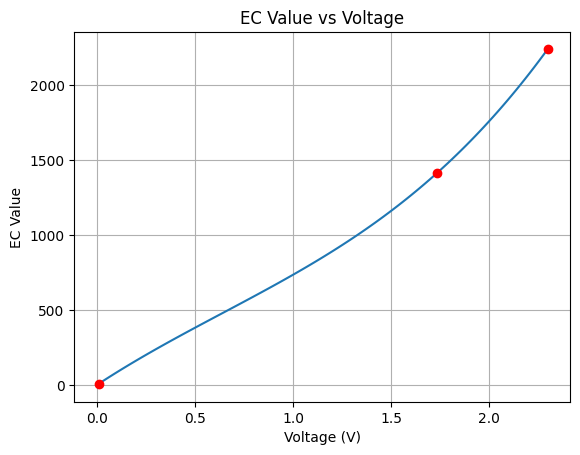

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 133.42 * x * x * x - 255.86 * x * x + 857.39 * x

plt.figure()
x = np.linspace(0, 2.3, 100)
y = f(x)
plt.plot(x, y)
plt.plot(1.73398, 1413, 'ro')
plt.plot(0.0117039, 5, 'ro')
plt.plot(2.30, 2241.38, 'ro')
# plt.plot(1.66728846, 1413, 'cx') # testing values
# plt.plot(1.83401731, 1413, 'cx') # testing values
plt.xlabel('Voltage (V)')
plt.ylabel('EC Value')
plt.title('EC Value vs Voltage')
plt.grid()
plt.show()

## Calibration Code

- Uses a buffer that holds 50 measurements.
- Voltage multiplier factors are determined at calibration time (raw voltage print, then a multiplier to get it to an expected voltage value). Gives a better fit when generating the fitting line.
- pH and Tds must be calibrated separately.

```
#include <OneWire.h>
#include <DallasTemperature.h>
#include<ADS1115_WE.h> 
#include<Wire.h>
#define I2C_ADDRESS_PH  0x4B
#define I2C_ADDRESS_TDS  0x4A

// GPIO where the DS18B20 is connected to
const int oneWireBus = 5;  

// Setup a oneWire instance to communicate with any OneWire devices
OneWire oneWire(oneWireBus);

// Pass our oneWire reference to Dallas Temperature sensor 
DallasTemperature sensors(&oneWire);

ADS1115_WE adc_ph = ADS1115_WE(I2C_ADDRESS_PH);
ADS1115_WE adc_tds = ADS1115_WE(I2C_ADDRESS_TDS);

float acidVoltage    = 1043.00;    //buffer solution 4.01 at 25C
float neutralVoltage = 788.91;     //buffer solution 7.0 at 25C
float baseVoltage    = 561.75;     //buffer solution 10.0 at 25C
float referenceTemp = 25.0; // reference temperature of 25 deg C
float measuredConductivityStandard = 665.76; // Measured conductivity standard for calibration
float measuredDeionizedWater = 16.23;         // Measured deionized water for calibration
int iterations = 50;
float *analogBuffer;   // Dynamic array for buffer, NOTE: there is no destructor for the buffer
int analogBufferIndex; // Index for circular buffer

void setup() {
  Wire.begin();
  Serial.begin(9600);
  
  pinMode(23, OUTPUT);
  digitalWrite(23, HIGH);
  pinMode(19, OUTPUT);
  digitalWrite(19, HIGH);

  if(!adc_ph.init()){
    Serial.print("ADS1115 No 1 not connected!");
  }
  adc_ph.setVoltageRange_mV(ADS1115_RANGE_6144);
  adc_ph.setMeasureMode(ADS1115_CONTINUOUS); 
  adc_ph.setCompareChannels(ADS1115_COMP_0_GND);
  
  if(!adc_tds.init()){
    Serial.print("ADS1115 No 2 not connected!");
  }
  adc_tds.setVoltageRange_mV(ADS1115_RANGE_6144);
  adc_tds.setMeasureMode(ADS1115_CONTINUOUS); 
  adc_tds.setCompareChannels(ADS1115_COMP_0_GND);

  pinMode(18, OUTPUT);
  digitalWrite(18, HIGH);
  sensors.begin();

  // Allocate memory for analog buffer
  analogBuffer = new float[iterations];
  for (int i = 0; i < iterations; i++)
    {
      analogBuffer[i] = 0.0;
    }
}

void loop() {
  float voltage = 0.0;
  float probeVoltage = 0.0;
  
  sensors.requestTemperatures(); 
  float temperatureC = sensors.getTempCByIndex(0);
  float temperatureF = sensors.getTempFByIndex(0);
  Serial.print(temperatureC);
  Serial.println("ºC");
  Serial.print(temperatureF);
  Serial.println("ºF");
  
  
  // Serial.println("****************BEGIN PH**********************");
  // // BEGIN PH
  // voltage = adc_ph.getResult_mV(); // 10kOhm resistor present
  // probeVoltage = voltage*2;  // multiply by 10kOhm factor
  // Serial.println("Voltage [mV], ADS1115 PH: ");
  // Serial.println(voltage);
  // Serial.println("Adjusted Voltage [mV], ADS1115 PH: ");
  // Serial.println(probeVoltage, 12);

  // analogBuffer[analogBufferIndex] = probeVoltage;
  // analogBufferIndex = (analogBufferIndex + 1) % iterations;
  // float sortedBuffer[iterations];
  // std::copy(analogBuffer, analogBuffer + iterations, sortedBuffer);
  // std::sort(sortedBuffer, sortedBuffer + iterations);
  // float medianValue;
  // if (iterations % 2 == 0)
  // {
  //   medianValue = (sortedBuffer[iterations / 2 - 1] + sortedBuffer[iterations / 2]) / 2.0f;
  // }
  // else
  // {
  //   medianValue = sortedBuffer[iterations / 2];
  // }
  // for (int i = 0; i < iterations; i++)
  //   {
  //     Serial.print(sortedBuffer[i]);
  //     Serial.print( " ");
  //   }
  // Serial.println("");
  // Serial.print("Median Value: ");
  // Serial.println(medianValue, 12);
  // Serial.print("Median Value * 1/2: ");
  // Serial.println(medianValue/2, 12);

  // probeVoltage = medianValue;
  // // Build pH calibration code
  // double slopePH = ((7.0 - 4.01) / (neutralVoltage * 2 - acidVoltage * 2) + (7 - 10.0) / (neutralVoltage * 2 - baseVoltage * 2)) / 2;
  // double interceptPH = 7.0 - slopePH * (neutralVoltage * 2);
  // double compensatedSlope = slopePH * ((temperatureC + 273.15) / (25.0 + 273.15));
  // double pHValue = compensatedSlope * probeVoltage + interceptPH; //y = k*x + b
  // // double pHValue = slopePH * probeVoltage + interceptPH; //y = k*x + b
  // Serial.print("slope:");
  // Serial.print(slopePH,12);
  // Serial.print(",intercept:");
  // Serial.println(interceptPH,12);
  // Serial.print("pHValue: ");
  // Serial.println(pHValue);
	
	Serial.println("****************BEGIN TDS**********************");
  // BEGIN TDS
  // Build Tds Calibration code
  voltage = adc_tds.getResult_V(); // 10kOhm resistor present
  probeVoltage = voltage * 3.33457692; // multiply by 10kOhm factor, 1413 uS/cm factor
  Serial.print("Voltage [V], ADS1115 No 2: ");
  Serial.println(voltage, 12);
  Serial.print("Adjusted Voltage [V] using 1413 uS/cm factor, ADS1115 No 2: ");
  Serial.println(probeVoltage,12);
  
  analogBuffer[analogBufferIndex] = probeVoltage;
  analogBufferIndex = (analogBufferIndex + 1) % iterations;
  float sortedBuffer[iterations];
  std::copy(analogBuffer, analogBuffer + iterations, sortedBuffer);
  std::sort(sortedBuffer, sortedBuffer + iterations);
  float medianValue;
  if (iterations % 2 == 0)
  {
    medianValue = (sortedBuffer[iterations / 2 - 1] + sortedBuffer[iterations / 2]) / 2.0f;
  }
  else
  {
    medianValue = sortedBuffer[iterations / 2];
  }
  for (int i = 0; i < iterations; i++)
    {
      Serial.print(sortedBuffer[i]);
      Serial.print( " ");
    }
  Serial.println("");
  Serial.print("Median Value: ");
  Serial.println(medianValue, 12);
  Serial.print("Median Value * 1/3.33457692: ");
  Serial.println(medianValue/3.33457692, 12);
  probeVoltage = medianValue;

  float kCoefficient = 0.019;
  float rawEC = (133.42 * probeVoltage * probeVoltage * probeVoltage - 255.86 * probeVoltage * probeVoltage + 857.39 * probeVoltage);
  Serial.print("TDS before Temp Correction and fitting function: ");
  Serial.println(rawEC * 0.5);
  float tempCorrection = 1.0 + kCoefficient * (temperatureC - referenceTemp);
  float compensatedEC = rawEC / tempCorrection;
  float rawTds = compensatedEC * 0.5;
  Serial.print("TDS after Temp Correction and before fitting function: ");
  Serial.println(rawTds);
  float slopeTDS = (706.5 - 2.5) / (measuredConductivityStandard - measuredDeionizedWater);
  float interceptTDS = 0 - slopeTDS * measuredDeionizedWater;
  float correctedTds = slopeTDS * rawTds + interceptTDS; //y = k*x + b
  Serial.print("slope: ");
  Serial.println(slopeTDS);
  Serial.print("intercept:");
  Serial.println(interceptTDS);
  Serial.print("After Temp Correction and fitting function: correctedTds = ");
  Serial.println(correctedTds);
 
  Serial.println("****************************");  
  
   delay(100);
 }
```

---
### Additional Calculations

### Second Test used these fitting functions:

- Test started 01.04.2025.

- PH:

```
Let's confirm the values...
Resistance multiplier: 2
Neutral voltage: 1577.82
Acid voltage: 2086.0
Base voltage: 1123.5
Slope: -0.006243508602849564
Intercept: 16.851132743748096
Compensated slope: -0.006243508602849564
```

_Results in_:
$ y = -0.006243508602849564 * x + 16.851132743748096 $

- TDS:

```
Let's confirm the values...
Resistance multiplier: 3.33457692
Conductivity Standard: 665.76
Deionized Water: 16.23
Slope: 1.0838606376918696
Intercept: -17.591058149739045
```

_Results in_:
$ y = 1.0838606376918696 * x - 17.591058149739045 $

- The factor __rawTds__ in the data saved to the SD Card and to Thinger.io is before applying this function. The data __finalTds__ includes the calculation with this function.

(9, 11)
PH R^2: 0.1270424461644828
PH RMSE: 0.15513417855625408
PH Standard Deviation: 0.1660393126033042


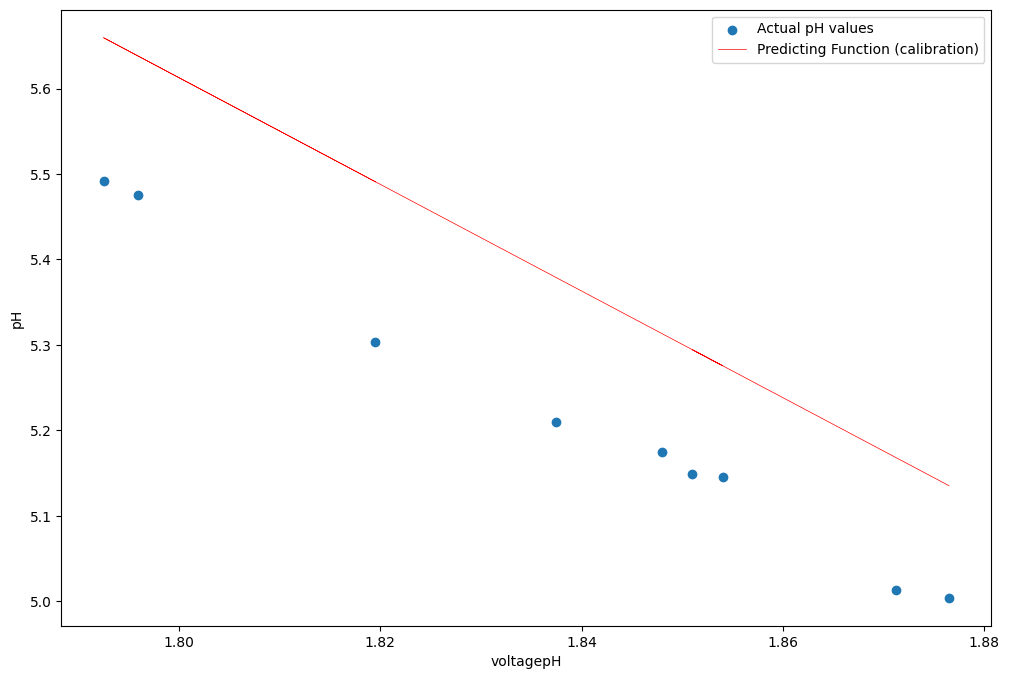

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Let's confirm the values...
# Resistance multiplier: 2
# Neutral voltage: 1577.82
# Acid voltage: 2086.0
# Base voltage: 1123.5
# Slope: -0.006243508602849564
# Intercept: 16.851132743748096
# Compensated slope: -0.006243508602849564

# Load dataset
df = pd.read_csv('data.csv', sep=';')
print(df.shape)

# Computed pH values from the sensor
y_computed = df['pH'].to_numpy()  # measured and fitted values

# Raw (unfitted), voltage multiplied values from the sensor
voltagePh = df['voltagePh'].to_numpy()  # measured and unfitted values

# Predicted pH values using the equation
y_predicted = -6.243508602849564 * voltagePh + 16.851132743748096

# Compute mean of actual values
y_mean = np.mean(y_computed)

# Compute R^2
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Compute RMSE
mse = ((y_computed - y_predicted) ** 2).mean()
rmse = np.sqrt(mse)

print("PH R^2:", r_squared)
print("PH RMSE:", rmse)
print("PH Standard Deviation:", np.std(y_computed))

# Let's plot the pH dataset
plt.figure(figsize=(12, 8))
plt.scatter(voltagePh, y_computed, label='Actual pH values')
# plt.scatter(voltagePh, y_predicted, label='Predicted pH values')
plt.plot(voltagePh, y_predicted, color='red', label='Predicting Function (calibration)', linewidth=0.5)
plt.xlabel('voltagepH')
plt.ylabel('pH')
plt.legend()
plt.show()




TDS R^2: 0.9999999999921031
TDS RMSE: 3.19341329352457e-06
TDS Standard Deviation:  1.1363863446767248


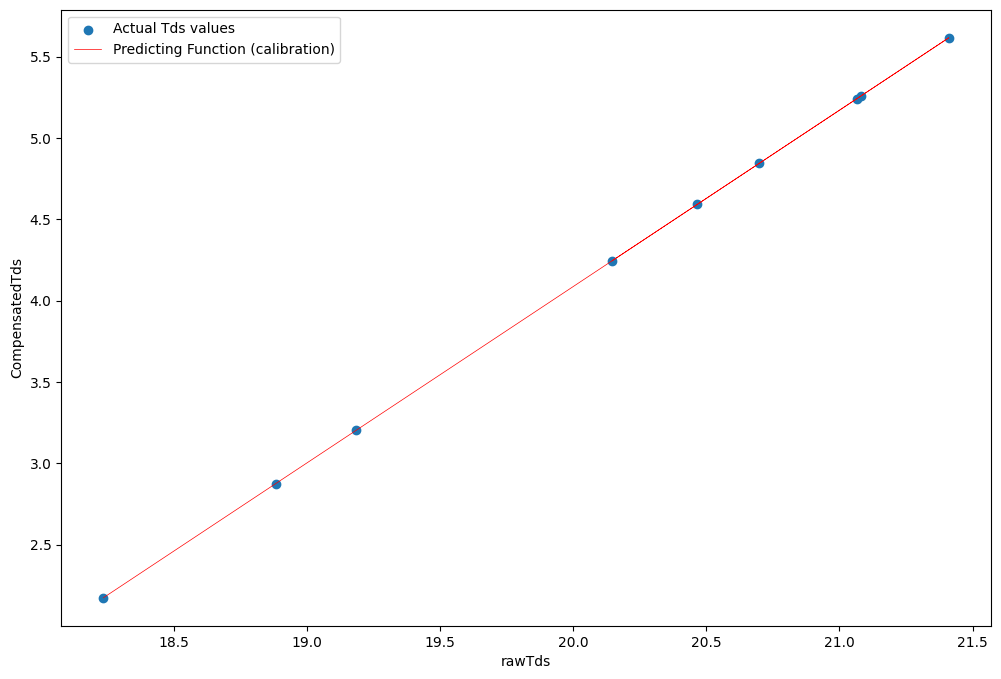

In [9]:
# Let's confirm the values...
# Resistance multiplier: 3.33457692
# Conductivity Standard: 665.76
# Deionized Water: 16.23
# Slope: 1.0838606376918696
# Intercept: -17.591058149739045

# Computed Tds values from the sensor
y_computed = df['TDS'].to_numpy()  # measured and fitted values

# Raw (unfitted), voltage multiplied temperature adjusted Tds values from the sensor
raw_Tds = df['rawTDS'].to_numpy()  # measured and unfitted values

# Predicted TDS values using the equation
y_predicted = 1.0838606376918696 * raw_Tds - 17.591058149739045

# Compute mean of actual values
y_mean = np.mean(y_computed)

# Compute R^2
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Compute RMSE
mse = ((y_computed - y_predicted) ** 2).mean()
rmse = np.sqrt(mse)

print("TDS R^2:", r_squared)
print("TDS RMSE:", rmse)
print("TDS Standard Deviation: ", np.std(y_computed))

# Let's plot the Tds dataset
plt.figure(figsize=(12, 8))
plt.scatter(raw_Tds, y_computed, label='Actual Tds values')
#plt.scatter(raw_Tds, y_predicted, label='Predicted Tds values')
plt.plot(raw_Tds, y_predicted, color='red', label='Predicting Function (calibration)', linewidth=0.5)
plt.xlabel('rawTds')
plt.ylabel('CompensatedTds')
plt.legend()
plt.show()